# Unsupervised Learning

Unsupervised learning can play an important role for prediction, both for
regression and classification problems. In some cases, we want to predict a
category in the absence of any labeled data. For example, we might want to
predict the type of vegetation in an area from a set of satellite sensory data.
Since we don’t have a response variable to train a model, clustering gives us
a way to identify common patterns and categorize the regions.

Clustering is an especially important tool for the “cold-start problem.” In
these types of problems, such as launching a new marketing campaign or
identifying potential new types of fraud or spam, we initially may not have
any response to train a model. Over time, as data is collected, we can learn
more about the system and build a traditional predictive model. But
clustering helps us start the learning process more quickly by identifying
population segments.

Unsupervised learning is also important as a building block for regression
and classification techniques. With big data, if a small subpopulation is not
well represented in the overall population, the trained model may not
perform well for that subpopulation. With clustering, it is possible to identify
and label subpopulations. Separate models can then be fit to the different
subpopulations. Alternatively, the subpopulation can be represented with its
own feature, forcing the overall model to explicitly consider subpopulation
identity as a predictor.

## Principal Components Analysis

Often, variables will vary together (covary), and some of the variation in one is
actually duplicated by variation in another. Principal components analysis (PCA)
is a technique to discover the way in which numeric variables covary

- **Principal component**: A linear combination of the predictor variables.
- **Loadings**: The weights that transform the predictors into the components.
    - _Synonym_: Weights
- **Screeplot**: A plot of the variances of the components, showing the relative importance of the components

The idea in PCA is to combine multiple numeric predictor variables into a
smaller set of variables, which are weighted linear combinations of the original
set. The smaller set of variables, the principal components, "explains" most of
the variability of the full set of variables, reducing the dimension of the data. The
weights used to form the principal components reveal the relative contributions
of the original variables to the new principal components.

### A Simple Example

For two variables, $X_1$ and $X_2$, there are two principal components $Z_i(i=1\ or\ 2)$:
\begin{equation}
Z_i = w_{i,1}X_1 + w_{i,2}X_2
\end{equation}

The weights $w_{i,1}, w_{i,2}$ are known as the component loadings. These
transform the original variables into the principal components. The first principal
component $Z_1$ is the linear combination that best explains the total variation.
The second principal component, $Z_2$, explains the remaining variation (it is also
the linear combination that is the worst fit).

The weights of the principal components can be negative, but reversing the sign of all
the weights does not change the principal component. For example, using weights of 0.747 and
0.665 for the first principal component is equivalent to the negative weights, just as an infinite
line defined by the origin and 1,1 is the same as one defined by the origin and –1, –1.

### Computing the Principal Components

Going from two variables to more variables is straightforward. For the first
component, simply include the additional predictor variables in the linear
combination, assigning weights that optimize the collection of the covariation
from all the predictor variables into this first principal component (covariance is
the statistical term; see "Covariance Matrix"). Calculation of principal
components is a classic statistical method, relying on either the correlation
matrix of the data or the covariance matrix, and it executes rapidly, not relying
on iteration. As noted earlier, it works only with numeric variables, not
categorical ones. The full process can be described as follows:
1. In creating the first principal component, PCA arrives at the linear combination of predictor variables that maximizes the percent of total variance explained.
2. This linear combination then becomes the first "new" predictor, $Z_1$
3. PCA repeats this process, using the same variables, with different weights to create a second new predictor, $Z_2$. The weighting is done such that $Z_1$ and $Z_2$ are uncorrelated.
4. The process continues until you have as many new variables, or components, $Z_i$ as original variables $X_i$
5. Choose to retain as many components as are needed to account for most of the variance
6. The result so far is a set of weights for each component. The final step is to convert the original data into new principal component scores by applying the weights to the original values. These new scores can then be used as the reduced set of predictor variables

### Interpreting Principal Components

The nature of the principal components often reveals information about the
structure of the data. There are a couple of standard visualization displays to help
you glean insight about the principal components. One such method is a
Screeplot to visualize the relative importance of principal components

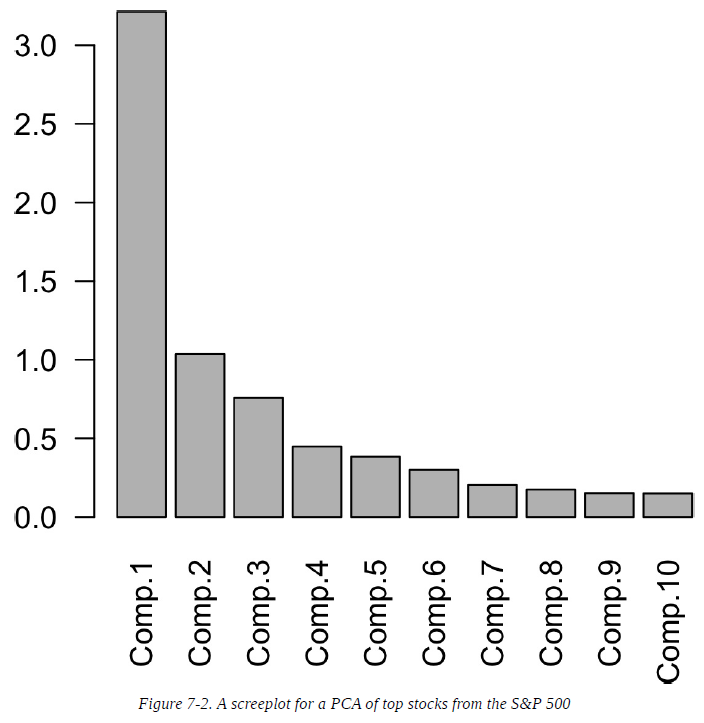

It can be especially revealing to plot the weights of the top principal
components.

The loadings for the top five components are shown below. The loadings
for the first principal component have the same sign: this is typical for data in
which all the columns share a common factor (in this case, the overall stock
market trend). The second component captures the price changes of energy
stocks as compared to the other stocks. The third component is primarily a
contrast in the movements of Apple and CostCo. The fourth component contrasts
the movements of Schlumberger to the other energy stocks. Finally, the fifth
component is mostly dominated by financial companies.

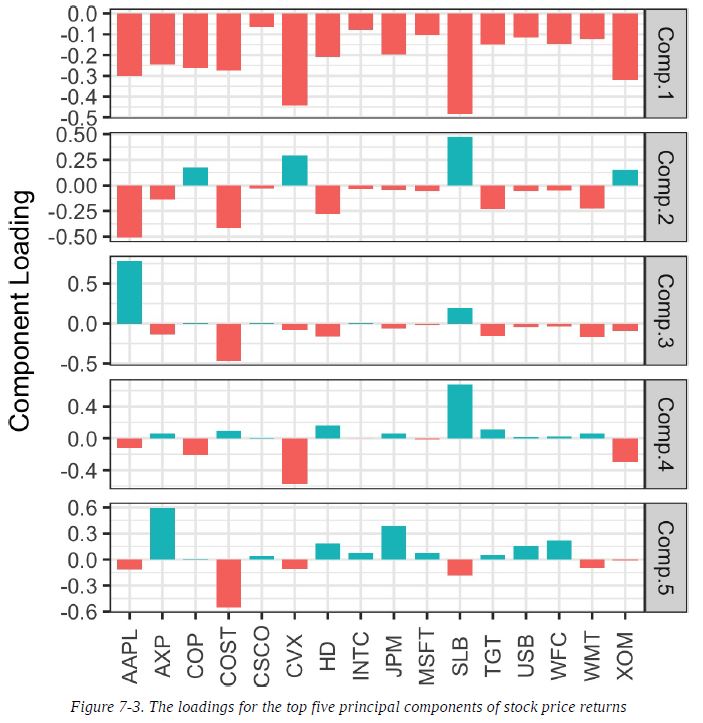

If your goal is to reduce the dimension of the data, you must decide how many principal
components to select. The most common approach is to use an ad hoc rule to select the
components that explain “most” of the variance

### Key Takeaways

- Principal components are linear combinations of the predictor variables (numeric data only)
- They are calculated so as to minimize correlation between components, reducing redundancy
- A limited number of components will typically explain most of the variance in the outcome variable
- The limited set of principal components can then be used in place of the (more numerous) original predictors, reducing dimensionality.

## K-Means Clustering

Clustering is a technique to divide data into different groups, where the records
in each group are similar to one another. A goal of clustering is to identify
significant and meaningful groups of data

- **Cluster**: A group of records that are similar.
- **Cluster mean**: The vector of variable means for the records in a cluster.
- **K**: The number of clusters.

K-means divides the data into K clusters by minimizing the sum of the squared
distances of each record to the mean of its assigned cluster. The is referred to as
the within-cluster sum of squares or within-cluster SS. K-means does not ensure
the clusters will have the same size, but finds the clusters that are the best
separated.

It is typical to normalize (standardize) continuous variables by subtracting the mean and
dividing by the standard deviation. Otherwise, variables with large scale will dominate the
clustering process

Say we want to split a dataset of two features $(x, y)$ into 4 clusters ($K=4$). This means assigning each record ($x_i, y_i$)
to a cluster $k$. Given an assignment of $n_k$ records to cluster $k$, the centre of the cluster ($\overline{x}_k, \overline{y}_k$)
is the mean of the points in the cluster.

The sum of squares within a cluster is given by:

\begin{equation}
SS_k = \sum_{i\ \in\ Cluster\ k} (x_i -  \overline{x}_k)^2 + (y_i -  \overline{y}_k)^2
\end{equation}

K-means finds the assignment of records that minimizes within-cluster sum of
squares across all four clusters $SS_1 + SS_2 + SS_3 + SS_4$

\begin{equation}
\sum^4_{k=1} SS_i
\end{equation}

### K-Means Algorithm

The algorithm starts with a user-specified K and an initial set of cluster means,
then iterates the following steps:

1. Assign each record to the nearest cluster mean as measured by squared distance.
2. Compute the new cluster means based on the assignment of records.

The algorithm converges when the assignment of records to clusters does not
change.

For the first iteration, you need to specify an initial set of cluster means. Usually
you do this by randomly assigning each record to one of the $K$ clusters, then
finding the means of those clusters.

Since this algorithm isn’t guaranteed to find the best possible solution, it is
recommended to run the algorithm several times using different random samples
to initialize the algorithm. When more than one set of iterations is used, the Kmeans
result is given by the iteration that has the lowest within-cluster sum of
squares.

### Interpreting the Clusters

An important part of cluster analysis can involve the interpretation of the
clusters. The two most important outputs from kmeans are the sizes of the
clusters and the cluster means.

Imbalanced cluster sizes can result from
distant outliers, or groups of records very distinct from the rest of the data—both
may warrant further inspection.

### Selecting the Number of Clusters

The K-means algorithm requires that you specify the number of clusters K.
Sometimes the number of clusters is driven by the application. For example, a
company managing a sales force might want to cluster customers into
"personas" to focus and guide sales calls. In such a case, managerial
considerations would dictate the number of desired customer segments

In the absence of a cluster number dictated by practical or managerial
considerations, a statistical approach could be used. There is no single standard
method to find the "best" number of clusters.

A common approach, called the elbow method, is to identify when the set of
clusters explains “most” of the variance in the data. Adding new clusters beyond
this set contributes relatively little incremental contribution in the variance
explained. The elbow is the point where the cumulative variance explained
flattens out after rising steeply, hence the name of the method.

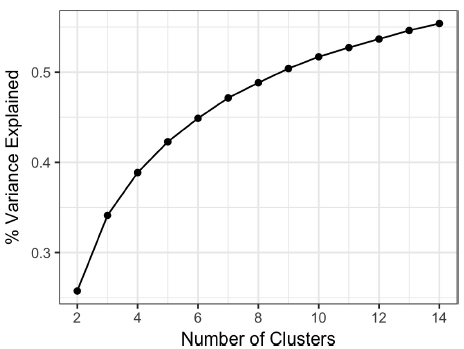

Above shows the cumulative percent of variance explained for the default
data for the number of clusters ranging from 2 to 15. Where is the elbow in this
example? There is no obvious candidate, since the incremental increase in
variance explained drops gradually. This is fairly typical in data that does not
have well-defined clusters. This is perhaps a drawback of the elbow method, but
it does reveal the nature of the data.

In evaluating how many clusters to retain, perhaps the most important test is this:
how likely are the clusters to be replicated on new data? Are the clusters
interpretable, and do they relate to a general characteristic of the data, or do they
just reflect a specific instance? You can assess this, in part, using crossvalidation

### Key Takeaways
- The number of desired clusters, K, is chosen by the user.
- The algorithm develops clusters by iteratively assigning records to the nearest cluster mean until cluster assignments do not change.
- Practical considerations usually dominate the choice of K; there is no statistically determined optimal number of clusters.

## Hierarchical Clustering

Hierarchical clustering is an alternative to K-means that can yield very different
clusters. Hierarchical clustering is more flexible than K-means and more easily
accommodates non-numerical variables. It is more sensitive in discovering
outlying or aberrant groups or records. Hierarchical clustering also lends itself to
an intuitive graphical display, leading to easier interpretation of the clusters.

- **Dendrogram**: A visual representation of the records and the hierarchy of clusters to which they belong.
- **Distance**: A measure of how close one record is to another.
- **Dissimilarity**: A measure of how close one cluster is to another.

Hierarchical clustering’s flexibility comes with a cost, and hierarchical clustering
does not scale well to large data sets with millions of records. For even modestsized
data with just tens of thousands of records, hierarchical clustering can
require intensive computing resources. Indeed, most of the applications of
hierarchical clustering are focused on relatively small data sets

### A Simple Example

Hierarchical clustering works on a data set with n records and p variables and is
based on two basic building blocks:

- A distance metric $d_{i,j}$ to measure the distance beween two records $i$ and $j$
- A dissimilarity metric $D_{A,B}$ to measure the difference between two clusters $A$ and $B$ based on the distances $d_{i,j}$ between the members of each cluster

For applications involving numeric data, the most importance choice is the
dissimilarity metric. Hierarchical clustering starts by setting each record as its
own cluster and iterates to combine the least dissimilar clusters.

### The Dendrogram

Hierarchical clustering lends itself to a natural graphical display as a tree,
referred to as a dendrogram. The name comes from the Greek words dendro
(tree) and gramma (drawing).

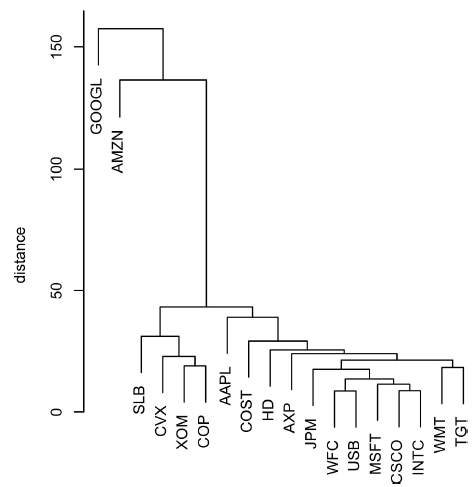

Above, the leaves of the tree correspond to the
records. The length of the branch in the tree indicates the degree of dissimilarity
between corresponding clusters. The returns for Google and Amazon are quite
dissimilar to the returns for the other stocks. The other stocks fall into natural
groups: energy stocks, financial stocks, and consumer stocks are all separated
into their own subtrees.

### The Agglomerative Algorithm